<a href="https://colab.research.google.com/github/chineidu/NLP-Tutorial/blob/main/notebook/03_tensorflow/03_classification_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification With TensorFlow

Types of Classification
1. Binary
2. Multiclass
3. Multilabel


In [1]:
# Standard imports
from typing import List, Tuple, Dict, Optional
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

### Create Data For Classification

* Using scikit-learn

In [2]:
from sklearn.datasets import make_circles

RANDOM_STATE = 1
SEED = 2
NOISE = 0.05
N_SAMPLES = 2_000

X, y = make_circles(N_SAMPLES, noise=NOISE, random_state=RANDOM_STATE)

X.shape, y. shape

((2000, 2), (2000,))

In [3]:
# Preview the data
X[:4], y[:4]

(array([[-0.54830966, -0.90374793],
        [-0.287522  , -0.70272049],
        [-0.19083057,  0.83641477],
        [-0.29472923,  0.72388715]]), array([0, 1, 1, 1]))

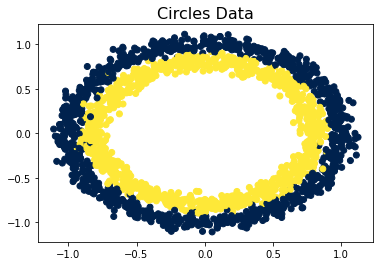

In [6]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cividis)
plt.title("Circles Data", size=16)
plt.show()

### Build A Classification Model (NN)

* using a single layer with 10 neurons.
* classification loss = **binary_crossentropy**
* classification metrics = **accuracy**
* Epochs = 50

In [8]:
# Build a model
tf.random.set_seed(SEED)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=[X.shape[-1]])
])

# Compile
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_1 = model_1.fit(X, y, epochs=50)

Epoch 1/50
63/63 [==============================] - 1s 2ms/step - loss: 4.2548 - accuracy: 0.1520
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 3.8759 - accuracy: 0.1500
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 3.7069 - accuracy: 0.1535
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 3.5494 - accuracy: 0.1555
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 3.3114 - accuracy: 0.1570
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 3.2145 - accuracy: 0.1535
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 3.0707 - accuracy: 0.1470
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 2.8497 - accuracy: 0.1435
Epoch 9/50
63/63 [==============================] - 0s 2ms/step - loss: 2.6911 - accuracy: 0.1460
Epoch 10/50
63/63 [==============================] - 0s 2ms/step - loss: 2.6550 - accuracy: 0.1425
Epoch 11/50
63/63 [

In [10]:
# Evaluate
model_1.evaluate(X, y)

63/63 [==============================] - 0s 1ms/step - loss: 1.0329 - accuracy: 0.0975


[1.0328829288482666, 0.09749999642372131]

### Comment

* The model's performance is very poor!
* What might be the cause of the poor performance??
* Maybe I should add an extra layer 🤔

In [11]:
# Build
tf.random.set_seed(SEED)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, input_shape=[X.shape[-1]]),
    tf.keras.layers.Dense(units=1)
])

# Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit 
model_2.fit(X, y, epochs=50)

Epoch 1/50
63/63 [==============================] - 1s 3ms/step - loss: 1.4426 - accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.5000
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4865
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4820
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4470
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5130
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4735
Epoch 8/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4760
Epoch 9/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4455
Epoch 10/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5150
Epoch 11/50
63/63 [

### Comment:

* The model still has a very poor performance!
* Let's visualize the model's predictions.

In [18]:
def plot_decision_boundary(model, X:np.ndarray, y:np.ndarray) -> "Plot":
  """ This is used to plots the decision boundary created by a model 
  predicting on X. This function has been adapted from two phenomenal 
  resources:
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
  2. (Made with ML basics - https://github.com/GokuMohandas/MadeWithML/"
  "blob/main/notebooks/08_Neural_Networks.ipynb")
  """
  # Define the axis boundaries of the plot and create a meshgrid
  # The numpy.meshgrid function is used to create a rectangular grid out of two 
  # given one-dimensional arrays representing the Cartesian indexing or Matrix 
  # indexing. Meshgrid function is somewhat inspired from MATLAB.
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 2s 4ms/step
doing binary classifcation...


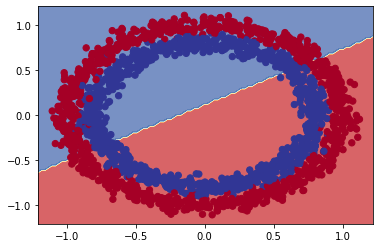

In [19]:
plot_decision_boundary(model_2, X, y)

### Improve The Model

* Add **non-linear** `activation` functions.


### You can checkout [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.98779&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [28]:
# Build
tf.random.set_seed(SEED)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation="ReLU", 
                          input_shape=[X.shape[-1]], name="input_layer"),
    tf.keras.layers.Dense(units=5, activation="ReLU", name="hidden_layer_1"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer")
])

# Compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Summary
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 5)                 15        
                                                                 
 hidden_layer_1 (Dense)      (None, 5)                 30        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Fit
history_3 = model_3.fit(X, y, epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 3ms/step - loss: 0.7056 - accuracy: 0.4865
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4340
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4710
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4785
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.4770
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5025
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5580
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5460
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5595
Epoch 10/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.6080
Epoch 11/

In [30]:
# Evaluate
model_3.evaluate(X, y)

63/63 [==============================] - 0s 2ms/step - loss: 0.1120 - accuracy: 0.9720


[0.11199122667312622, 0.972000002861023]

### Split The Data

* Split it into training and validation sets.

In [32]:
RATIO = 1_600
X_train, y_train = X[:RATIO], y[:RATIO]
X_val, y_val = X[RATIO:], y[RATIO:]

X_train.shape, X_val.shape 

((1600, 2), (400, 2))

In [37]:
# Rebuild model_3
tf.random.set_seed(SEED)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation="ReLU", 
                          input_shape=[X_train.shape[-1]], name="input_layer"),
    tf.keras.layers.Dense(units=5, activation="ReLU", name="hidden_layer"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", 
                          name="output_layer") # units=1 (since the output is binary)
])

# Compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Summary
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 5)                 15        
                                                                 
 hidden_layer (Dense)        (None, 5)                 30        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Fit
history_3 = model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
50/50 [==============================] - 1s 3ms/step - loss: 0.6955 - accuracy: 0.4881
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4938
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4919
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.4850
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.4869
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5075
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5231
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5200
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5194
Epoch 11/

In [39]:
# Evaluate
model_3.evaluate(X_val, y_val)

13/13 [==============================] - 0s 3ms/step - loss: 0.1772 - accuracy: 0.9350


[0.17718817293643951, 0.9350000023841858]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


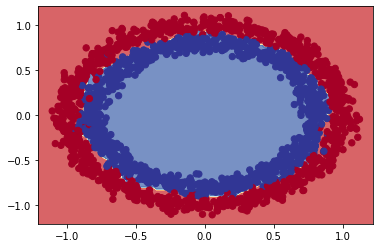

In [40]:
plot_decision_boundary(model_3, X, y)

### Implement Some Activation Functions

1. Linear function. 

$$x = x$$

2. Sigmoid function.

$$x = x$$

3. ReLU (Rectified Linear Unit) function.
4. Tanh function. 